In [45]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
import json
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [46]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [47]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [48]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [49]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [50]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [51]:
# for i, item in enumerate(list):

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | batagay-alyta
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 5 of Set 1 | vardo
Processing Record 6 of Set 1 | kahului
Processing Record 7 of Set 1 | bandarbeyla
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | finspang
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | sinnamary
Processing Record 12 of Set 1 | ixtapa
Processing Record 13 of Set 1 | sulecin
Processing Record 14 of Set 1 | antalaha
Processing Record 15 of Set 1 | zhigansk
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | langsa
Processing Record 21 of Set 1 | catuday
Processing Record 22 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 23 of Set 1 | roebourne
Processing R

Processing Record 39 of Set 4 | flinders
Processing Record 40 of Set 4 | codrington
Processing Record 41 of Set 4 | kitgum
Processing Record 42 of Set 4 | palmer
Processing Record 43 of Set 4 | kamenka
Processing Record 44 of Set 4 | coquimbo
Processing Record 45 of Set 4 | dunmore town
Processing Record 46 of Set 4 | batemans bay
Processing Record 47 of Set 4 | olafsvik
Processing Record 48 of Set 4 | juneau
Processing Record 49 of Set 4 | rio grande
Processing Record 50 of Set 4 | at-bashi
Processing Record 1 of Set 5 | huaibei
Processing Record 2 of Set 5 | santander jimenez
Processing Record 3 of Set 5 | baiyin
Processing Record 4 of Set 5 | maniitsoq
Processing Record 5 of Set 5 | hualmay
Processing Record 6 of Set 5 | saskylakh
Processing Record 7 of Set 5 | westerland
Processing Record 8 of Set 5 | nanakuli
Processing Record 9 of Set 5 | brae
Processing Record 10 of Set 5 | pontianak
Processing Record 11 of Set 5 | ondorhaan
City not found. Skipping...
Processing Record 12 of Se

Processing Record 26 of Set 8 | arlit
Processing Record 27 of Set 8 | qasigiannguit
Processing Record 28 of Set 8 | ybbs
City not found. Skipping...
Processing Record 29 of Set 8 | ignacio de la llave
Processing Record 30 of Set 8 | harnosand
Processing Record 31 of Set 8 | sfantu gheorghe
Processing Record 32 of Set 8 | ludza
Processing Record 33 of Set 8 | gari
Processing Record 34 of Set 8 | ormara
Processing Record 35 of Set 8 | mirnyy
Processing Record 36 of Set 8 | sao jose da coroa grande
Processing Record 37 of Set 8 | kizilskoye
Processing Record 38 of Set 8 | dibaya
City not found. Skipping...
Processing Record 39 of Set 8 | santa maria da vitoria
Processing Record 40 of Set 8 | oistins
Processing Record 41 of Set 8 | luziania
Processing Record 42 of Set 8 | belmonte
Processing Record 43 of Set 8 | torbay
Processing Record 44 of Set 8 | salalah
Processing Record 45 of Set 8 | nacozari
Processing Record 46 of Set 8 | griffith
Processing Record 47 of Set 8 | maltahohe
Processin

City not found. Skipping...
Processing Record 13 of Set 12 | rawson
Processing Record 14 of Set 12 | ancud
Processing Record 15 of Set 12 | isangel
Processing Record 16 of Set 12 | los llanos de aridane
Processing Record 17 of Set 12 | faanui
Processing Record 18 of Set 12 | tatawin
Processing Record 19 of Set 12 | monze
Processing Record 20 of Set 12 | jinxiang
Processing Record 21 of Set 12 | ha giang
Processing Record 22 of Set 12 | punta alta
Processing Record 23 of Set 12 | atbasar
Processing Record 24 of Set 12 | espinosa
Processing Record 25 of Set 12 | bonavista
Processing Record 26 of Set 12 | conceicao do araguaia
Processing Record 27 of Set 12 | newport
Processing Record 28 of Set 12 | palana
Processing Record 29 of Set 12 | visnes
Processing Record 30 of Set 12 | nizhnyaya tavda
Processing Record 31 of Set 12 | port shepstone
Processing Record 32 of Set 12 | comodoro rivadavia
Processing Record 33 of Set 12 | saint-francois
Processing Record 34 of Set 12 | tabuk
Processing 

In [52]:
len(city_data)

554

In [53]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Batagay-Alyta,67.8006,130.4114,54.79,53,22,2.80,RU,2021-07-30 16:08:24
1,Dikson,73.5069,80.5464,41.13,99,98,6.38,RU,2021-07-30 16:06:53
2,Castro,-24.7911,-50.0119,53.89,38,93,5.99,BR,2021-07-30 16:06:48
3,Vardo,70.3705,31.1107,50.20,76,0,11.50,NO,2021-07-30 16:08:25
4,Kahului,20.8947,-156.4700,73.42,84,1,5.75,US,2021-07-30 16:06:32
5,Bandarbeyla,9.4942,50.8122,77.00,78,100,29.57,SO,2021-07-30 16:08:26
6,Ushuaia,-54.8000,-68.3000,37.06,81,75,13.80,AR,2021-07-30 16:08:26
7,Finspang,58.7058,15.7674,69.80,67,54,8.97,SE,2021-07-30 16:08:27
8,Bredasdorp,-34.5322,20.0403,57.27,87,13,4.29,ZA,2021-07-30 16:08:27
9,Sinnamary,5.3833,-52.9500,83.73,69,20,3.91,GF,2021-07-30 16:08:28


In [54]:
# new_column_order = ["column2", "column4", "column1"]

new_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_order] 
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Batagay-Alyta,RU,2021-07-30 16:08:24,67.8006,130.4114,54.79,53,22,2.80
1,Dikson,RU,2021-07-30 16:06:53,73.5069,80.5464,41.13,99,98,6.38
2,Castro,BR,2021-07-30 16:06:48,-24.7911,-50.0119,53.89,38,93,5.99
3,Vardo,NO,2021-07-30 16:08:25,70.3705,31.1107,50.20,76,0,11.50
4,Kahului,US,2021-07-30 16:06:32,20.8947,-156.4700,73.42,84,1,5.75
5,Bandarbeyla,SO,2021-07-30 16:08:26,9.4942,50.8122,77.00,78,100,29.57
6,Ushuaia,AR,2021-07-30 16:08:26,-54.8000,-68.3000,37.06,81,75,13.80
7,Finspang,SE,2021-07-30 16:08:27,58.7058,15.7674,69.80,67,54,8.97
8,Bredasdorp,ZA,2021-07-30 16:08:27,-34.5322,20.0403,57.27,87,13,4.29
9,Sinnamary,GF,2021-07-30 16:08:28,5.3833,-52.9500,83.73,69,20,3.91


In [55]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [56]:
# print(json.dumps(city_weather.json(), indent=4, sort_keys=True))

In [57]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

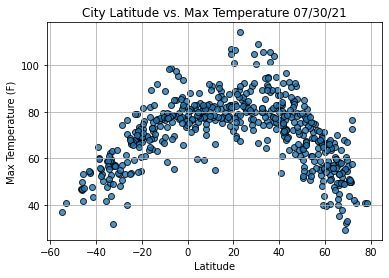

In [58]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

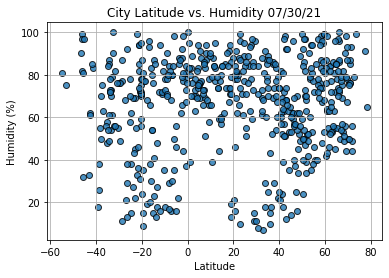

In [59]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

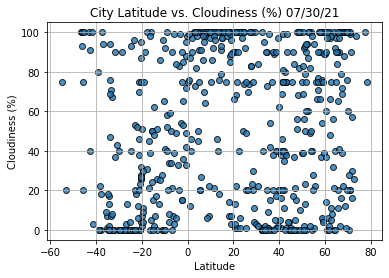

In [60]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

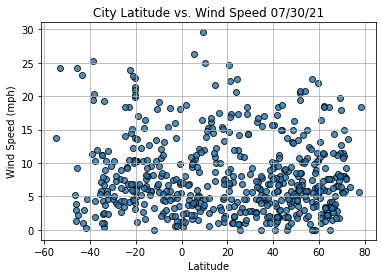

In [61]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [68]:
index13 = city_data_df.loc[13]
index13
city_data_df.loc[(city_data_df["Lat"] >= 0)] 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Batagay-Alyta,RU,2021-07-30 16:08:24,67.8006,130.4114,54.79,53,22,2.80
1,Dikson,RU,2021-07-30 16:06:53,73.5069,80.5464,41.13,99,98,6.38
3,Vardo,NO,2021-07-30 16:08:25,70.3705,31.1107,50.20,76,0,11.50
4,Kahului,US,2021-07-30 16:06:32,20.8947,-156.4700,73.42,84,1,5.75
5,Bandarbeyla,SO,2021-07-30 16:08:26,9.4942,50.8122,77.00,78,100,29.57


In [69]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [106]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
# def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))+ "\nr = " + str(round(r_value,3))+ "\np = " + str(round(p_value,4))+ "\nstd = " + str(round(std_err,3))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

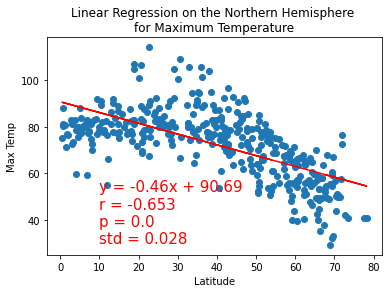

In [107]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,30))

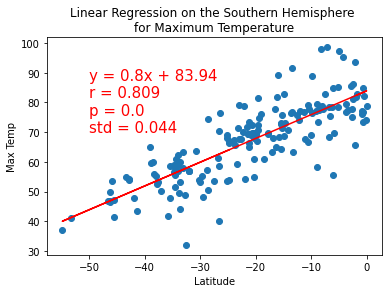

In [108]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,70))

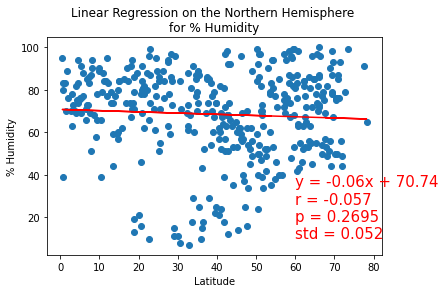

In [110]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(60,10))

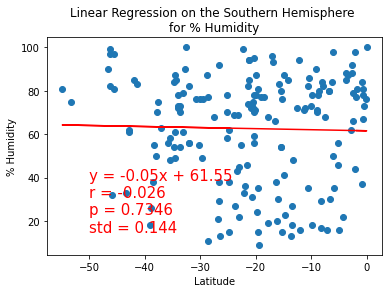

In [111]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

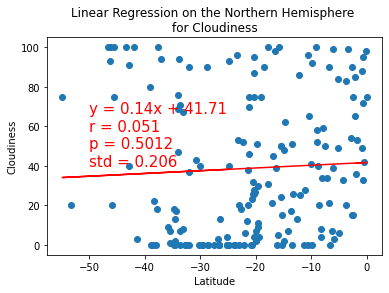

In [118]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Cloudiness', 'Cloudiness',(-50,40))

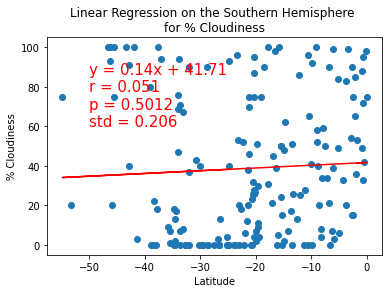

In [120]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

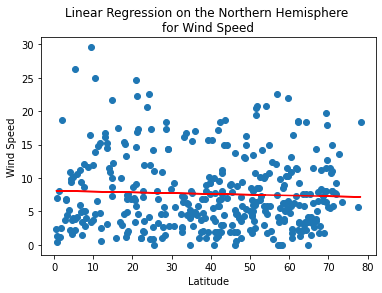

In [123]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

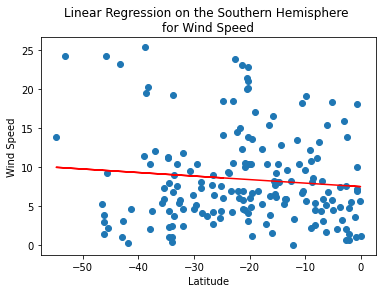

In [124]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))